<a href="https://colab.research.google.com/github/Alex-Gnn2813/Projects-Profession-AI-Data-Analytics-course/blob/main/Alessia_Giannalia_progetto_Segmentazione_della_clientela_di_un'azienda_di_servizi_finanziari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The dataset



In [ ]:
"""
To be ensure that we are working on a clean dataset,
we deleted the CUST_ID column, and chose the replacement for the missing data.
"""
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

DATASET_URL="https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
df=pd.read_csv(DATASET_URL)

df=df.drop("CUST_ID",axis=1)
mean_rep=df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]].mean(numeric_only=True)
df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]]=df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]].fillna(mean_rep)
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


#After examining the dataset, we choose to perform clustering based on the following features:
* ONEOFF_PURCHASES_FREQUENCY : How frequently purchases are made in one go.
* PURCHASES_INSTALLMENTS_FREQUENCY : frequency with which installment purchases are made.
* CASH_ADVANCE_FREQUENCY : Frequency with which the cash advance is paid.

###Number of clusters

In [ ]:
"""
This function Normalizes our data and trains the Kmeans model.
"""
def norm_and_model (X,n_clusters):
  mms=MinMaxScaler()
  X_norm=mms.fit_transform(X)
  kmeans=KMeans(n_clusters=n_clusters,init="k-means++",random_state=0)
  kmeans.fit(X_norm)
  return kmeans,X_norm

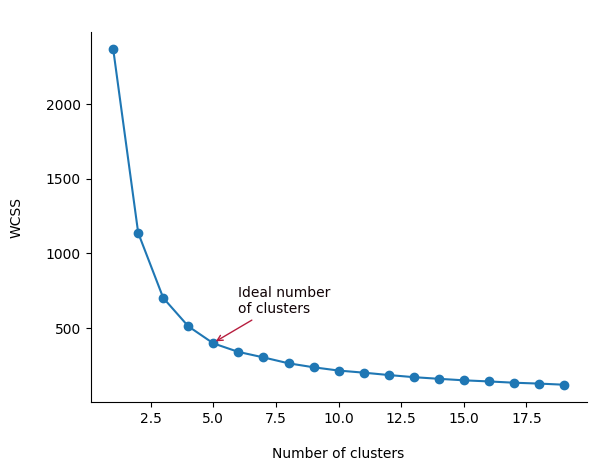

In [ ]:
"""
Now we create a chart to find the ideal number of clusters,
to do this we will use the Within Cluster Sum Of Squares (WCSS).
"""
warnings.filterwarnings("ignore",category=FutureWarning)

X=df[["ONEOFF_PURCHASES_FREQUENCY",
      "PURCHASES_INSTALLMENTS_FREQUENCY",
      "CASH_ADVANCE_FREQUENCY"]].values
wcss={}
for i in range(1,20):
  kmeans,_=norm_and_model(X,i)
  wcss[i]=kmeans.inertia_

plt.plot(list(wcss.keys()),list(wcss.values()),marker="o")
plt.xlabel("\nNumber of clusters")
plt.ylabel("WCSS\n")
plt.title(" ")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.annotate("Ideal number\nof clusters",
             xy=(5,400),xytext=(6,600),
             color="#100205",arrowprops=dict(arrowstyle="->",
             connectionstyle="arc3",color="#b71d3e"))
plt.show()

###Let's create the clusters

In [ ]:
"""
Now let's create a three-dimensional chart
to better visualize the clusters.
"""
kmeans,X_norm=norm_and_model(X,5)
centers=kmeans.cluster_centers_
y_kmeans=kmeans.predict(X_norm)

fig=go.Figure()
color_list=["#2C0047","#FF8913","#12B7B1","#19A11A","#F4FF00"]
for i in range(5):
    cluster_mask=y_kmeans==i
    fig.add_trace(go.Scatter3d(x=X_norm[cluster_mask,0], y=X_norm[cluster_mask,1], z=X_norm[cluster_mask,2],
                               mode="markers",
                               marker=dict(size=5, opacity=0.8,
                                           color=color_list[i]
                                           ),
                               name=f"Cluster {i+1}"))

fig.add_trace(go.Scatter3d(x=centers[:,0], y=centers[:,1], z=centers[:,2],
                           mode="markers",
                           marker=dict(size=10, color="red", opacity=0.5),
                           name="Centroids"))


fig.update_layout(scene=dict(
    xaxis_title="  [X] ONEOFF_PURCHASES_FREQUENCY",
    yaxis_title="  [Y] PURCHASES_INSTALLMENTS_FREQUENCY",
    zaxis_title="[Z] CASH_ADVANCE_FREQUENCY   ",
    aspectmode="cube",
    xaxis=dict(title_font=dict(size=10)),
    yaxis=dict(title_font=dict(size=10)),
    zaxis=dict(title_font=dict(size=10)),
),width=800, height=700, showlegend=True)
fig.show()

In [ ]:
"""
Let's calculate some metrics on the clusters to be able to describe them.
"""
for i in range(5):
    cluster_mask=y_kmeans==i
    descr=pd.DataFrame(X_norm[cluster_mask,:],columns=["ONEOFF_PURCHASES_FREQUENCY",
                                                       "PURCHASES_INSTALLMENTS_FREQUENCY",
                                                       "CASH_ADVANCE_FREQUENCY"]
                       ).describe()
    print(f"\n\nCluster {i+1}:\n\n{descr}")
    print("\n--------------------------------")



Cluster 1:

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1480.000000                       1480.000000   
mean                     0.093587                          0.459067   
std                      0.130982                          0.133904   
min                      0.000000                          0.222222   
25%                      0.000000                          0.333333   
50%                      0.000000                          0.416667   
75%                      0.166667                          0.583333   
max                      0.500000                          0.700000   

       CASH_ADVANCE_FREQUENCY  
count             1480.000000  
mean                 0.050968  
std                  0.107930  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.055555  
max                  0.666667  

--------------------------------


Cluster 2:

       ONE

##With the calculated metrics, we are now able to describe the clusters:

###**Cluster 1:**

>ONEOFF_PURCHASES_FREQUENCY with an average of 0.093587, users in this cluster tend to make few one-off purchases.

>PURCHASES_INSTALLMENTS_FREQUENCY with an average of 0.459067, indicates that they prefer to pay in installments.

>CASH_ADVANCE_FREQUENCY with an average of 0.050968, indicates very limited use of cash advances.

All values ​​are relatively low. These users appear to be prudent with their spending.

###**Cluster 2:**

>ONEOFF_PURCHASES_FREQUENCY with a mean of 0.077867, lower than Cluster 1, indicates an even smaller inclination for one-off purchases.

>PURCHASES_INSTALLMENTS_FREQUENCY with an average very close to 1 (0.922246), among all clusters, they prefer payments in installments.

>CASH_ADVANCE_FREQUENCY with an average of 0.044495, indicates limited use of cash advances.

These users show a marked preference for installment purchases.

###**Cluster 3:**

>ONEOFF_PURCHASES_FREQUENCY with an average of 0.065360, has the lowest value among all, these users show little interest in one-off purchases.

>PURCHASES_INSTALLMENTS_FREQUENCY with a very low average (0.018629), indicates low interest in installment purchases.

>CASH_ADVANCE_FREQUENCY with an average of 0.138703, show a preference for the use of cash compared to all other clusters.

They show a very low interest in purchases, both single and in installments, which could indicate that although they use the card, they prefer cash.

###**Cluster 4:**

>ONEOFF_PURCHASES_FREQUENCY in this cluster have the highest average, 0.785006, indicating that they tend to make one-off purchases frequently.

>PURCHASES_INSTALLMENTS_FREQUENCY This value is also high, 0.847389, suggesting they also appreciate paying in installments.

>CASH_ADVANCE_FREQUENCY with an average of 0.065737, the use of cash is present but not predominant.

Users in this cluster stand out for their very high frequency of both single and installment purchases, indicating a very active and diversified spending behavior.

###**Cluster 5:**

>ONEOFF_PURCHASES_FREQUENCY with an average of 0.729547, indicates an inclination to make single purchases more often.

>PURCHASES_INSTALLMENTS_FREQUENCY with an average of 0.095056, this group prefers to pay in one go rather than in installments.

>CASH_ADVANCE_FREQUENCY with an average of 0.059806, indicates that they occasionally use cash, but clearly prefer direct purchases.

This group is characterized by a high frequency of one-off purchases.

###**CONCLUSION**

Given that cluster 3 includes the majority of users (exactly 3906,000,000) a marketing campaign aimed at this cluster is strongly recommended to encourage the use of credit cards. In this case incentives such as immediate cashback or bonuses may be suitable.

Cluster 1 users also seem to be relatively reluctant to use the card so you could think about including them too in a campaign that provides discounts or rewards on purchases.

For the other clusters, specific offers can be thought of, for example:
for cluster 2 create a program that rewards installment purchases with points or cashback;
for the cluster 4 special advantages, premium services or exclusive offers;
cluster 5 may respond well to campaigns that create a sense of urgency or exclusivity.